# **implementacion Regresion Logistica**

Juan esteban Floyd
Juan David Aycardi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

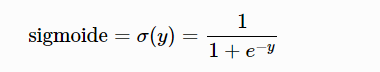

In [ ]:
'''
transforma en probabilidades (1 o 0) una entrada
'''
def funcionSigmoide(y):
    return 1 / (1 + np.exp(-y))

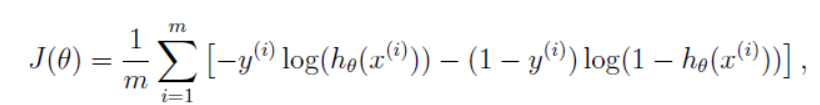

In [ ]:
'''
Funcion de costo y con la que se evaluara el modelo
en este caso es la diferencia entre la probabilidad 
predicha por nuestro modelo y la probabilidad real.
'''
def funcionDeCosto(X, y, theta):
    '''
    X = Un array NumPy que contiene las características de entrenamiento
    y = clase del entrenamiento
    theta = Un array NumPy que contiene los pesos del modelo.
    '''
    m = len(y)
    h = funcionSigmoide(np.dot(X, theta))
    J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J


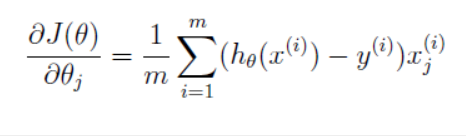

In [ ]:
'''
Se utiliza para actualizar los pesos en cada iteración de nuestro algoritmo de optimización. 
El gradiente es la dirección y la magnitud del cambio más rápido en la función de costo. 
Calculamos el gradiente utilizando la fórmula del gradiente para la regresión logística.
'''
def gradiente(X, y, theta):
    '''
    theta: Es un vector de pesos (parámetros) que se utilizarán en la regresión logística.
    X: Es una matriz que representa las características de los datos de entrada. 
    Cada fila de esta matriz representa un ejemplo de entrenamiento y cada columna representa una característica.
    y: Es un vector que contiene las etiquetas de clase reales para cada ejemplo de entrenamiento. Estas etiquetas deben ser 0 o 1.
    '''
    m = len(y)
    h = funcionSigmoide(np.dot(X, theta))
    res = (1 / m) * np.dot(X.T, h - y)
    return res

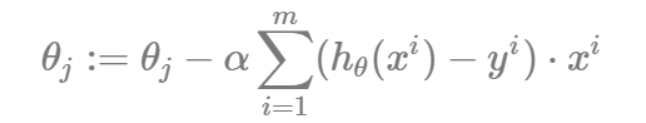

In [ ]:
'''
Esta funcion actualiza los pesos en cada iteración del algoritmo de optimización
'''
def GradienteDecendiente(X, y, theta, alpha, iter):
  '''
  theta: Es un vector de pesos (parámetros) que se utilizarán en la regresión logística.
  X: Es una matriz que representa las características de los datos de entrada. Cada fila de esta matriz representa un ejemplo de entrenamiento y cada columna representa una característica.
  y: Es un vector que contiene las etiquetas de clase reales para cada ejemplo de entrenamiento. Estas etiquetas deben ser 0 o 1.
  alpha: Es la tasa de aprendizaje, que determina la magnitud de los pasos de actualización de los pesos.
  num_iters: Es el número de iteraciones que se utilizarán para el descenso de gradiente. Cada iteración actualiza los pesos una vez.
  '''
  historial=[]
  for i in range(iter):
    costo = funcionDeCosto(X, y, theta)
    vGradiente = gradiente(X, y, theta)
    theta = theta - alpha * vGradiente
    historial.append(costo)
  return theta, historial

In [ ]:
''' 
Se entrena el modelo llamando a la función GradienteDecendiente, que devuelve los parámetros 
theta entrenados y un array con el historial de costos.

Para hacer una predicción sobre nuevos datos de entrada X_test, se normalizan los datos de entrada, 
se agrega una columna de unos y se utiliza la función sigmoid y los parámetros theta entrenados para obtener las predicciones y_pred. 
En este ejemplo se imprimen las predicciones obtenidas.
'''
# Generamos los datos de entrada X y las etiquetas Y
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([0, 1, 1])

# Normalizamos los datos de entrada X
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Agregamos una columna de unos a X para poder calcular el término independiente
X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))

# Inicializamos los parámetros theta a cero
theta = np.zeros(X_norm.shape[1])

# Definimos los parámetros de entrenamiento
alpha = 0.01
iter = 1000

# Entrenamos el modelo
nuevosTheta, historial = GradienteDecendiente(X_norm, Y, theta, alpha, iter)

# Hacemos una predicción sobre nuevos datos de entrada X_test
X_test = np.array([[2, 3, 4], [5, 6, 7]])
X_test_norm = (X_test - np.mean(X, axis=0)) / np.std(X, axis=0)
X_test_norm = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))
y_pred = funcionSigmoide(np.dot(X_test_norm, nuevosTheta))
print(y_pred)


[0.20843532 0.89605417]


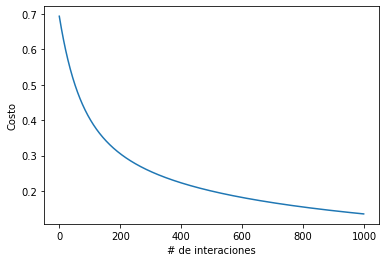

In [ ]:
'''
graficamos la función de costo en función del número de iteraciones para 
verificar que el costo disminuye en cada iteración y que nuestro modelo está aprendiendo correctamente.
'''
plt.plot(historial)
plt.xlabel('# de interaciones')
plt.ylabel('Costo')
plt.show()

# **Referencias**



1.   https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html.
2.   https://carlosjuliopardoblog.wordpress.com/2017/12/31/regresion-logistica/.
3. https://www.iartificial.net/regresion-logistica-para-clasificacion/.
4. https://dtellogaete.medium.com/regresión-logística-en-python-y-r-machine-learning-02-fa066b3add09.
5. https://numpy.org/doc/stable/reference/generated/numpy.hstack.html.






